# World Population and Poverty

In this project, I explore data from [Gapminder.org](https://www.gapminder.org/), which provides a fact-based view of global changes over time. Gapminder aggregates data from various sources into comprehensive tables that describe many countries around the world. These datasets are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md), which aims to compile public statistics across social, economic, and environmental domains into a unified dataset. All the datasets used in this project are sourced directly from the Systema Globalis without any modifications.

## Introduction

The goal of this project is to create and extend some of the famous visualizations from Gapminder using Python and data science tools. By analyzing the data, I aim to gain insights into global population trends and poverty levels.

To get started, I'll load the necessary libraries and datasets:

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## 1. Global Population Growth

## 1. Global Population Growth

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. This significant growth has raised concerns among scientists, economists, and politicians about its potential impacts.

The United Nations Population Division estimates that the world population will likely continue to grow throughout the 21st century but at a slower rate, potentially stabilizing at 11 billion by 2100. These projections help us understand long-term population processes and potential future scenarios.

[![Population Projection](pew_population_projection.png)](http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/)

In this part of the project, I will examine factors influencing population growth and their changes over time globally. This analysis consists of two main parts:

- **Analysis of Poland:** I will explore data specific to Poland to observe how factors like life expectancy, fertility rate, and child mortality have evolved over time and their relationship with population growth.
- **Global Patterns:** I will then compare Poland's trends with global patterns to determine if they are unique or reflect broader global trends in population growth.

First, I will load the dataset containing the total population of each country over time to begin my analysis.

In [2]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


### Poland

The Central European nation of Poland has undergone many changes over the centuries. In modern times it was (re)created as a democratic republic in 1919 after World War I. It was invaded and divided in World War II between Germany and the Soviet Union. War and the Holocaust had a devastating impact on its people. Poland was constituted in its current borders at the end of World War II (1945) under a communist government. In 1989, with the fall of the Soviet Union, Poland re-established itself as a democratic republic.

In this section of the project, I will examine aspects of the population of Poland since 1900. Poland's borders have changed, so I will look at the population within its current (2012) borders.

In the `population` table, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. The Alpha-3 code for Poland is "POL".

To start, I will create a table called `p_pop` that includes data specifically for Poland from the years 1900 through 2020. This table will have two columns: `time`, representing the years, and `population_total`, representing the population of Poland in each of those years.

**Question 1.** Create a table called `p_pop` that has two columns labeled `time` and `population_total`. The first column should contain the years from 1900 through 2020 (including both 1900 and 2020) and the second should contain the population of Poland in each of those years.

<!--
BEGIN QUESTION
name: q1_1
points:
- 0
- 0
- 0
- 4
-->

In [3]:
p_pop = population.where("geo", "pol").where("time",are.between_or_equal_to(1900,2020)).drop("geo")
p_pop

time,population_total
1900,24340168
1901,24517983
1902,24694172
1903,24868705
1904,25044468
1905,25221471
1906,25399722
1907,25579229
1908,25760003
1909,25848341


Here, I create a table called `p_five` that has the population of Poland every five years.

In [4]:
p_pop.set_format('population_total', NumberFormatter)

fives = np.arange(1900, 2021, 5) # 1900, 1905, 1910, ...
p_five = p_pop.sort('time').where('time', are.contained_in(fives))
p_five.show(3)

time,population_total
1900,"24,340,168"
1905,"25,221,471"
1910,"25,844,639"


To visualize the population over time, I will plot the population data for Poland. This visualization will help me observe the population trends from 1900 to 2020.

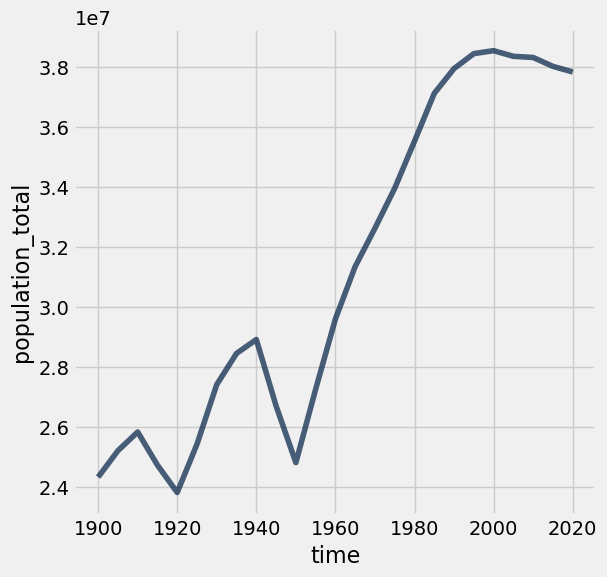

In [5]:
p_five.plot(0, 1)

Next, I will investigate the population growth of Poland by creating arrays that contain the population data for every five-year interval. Specifically, I will create two arrays:
- `initial`: This will contain the population for every five-year interval from 1900 to 2015 (inclusive). This array will include the years 1900 and 2015.
- `changed`: This will contain the population for every five-year interval from 1905 to 2020 (inclusive). This array will include the years 1905 and 2020.

The annual growth rate for each interval can be calculated using the formula:

$$\left(\frac{\text{Population at end of period}}{\text{Population at start of period}}\right)^{\frac{1}{\text{number of years}}} - 1$$

Below is the code that creates the `initial` and `changed` arrays, and adds a column to `p_five` called `annual_growth` to show the growth rates.

In [6]:
initial = p_five.where("time",are.between_or_equal_to(1900,2015)).column("population_total")
changed = p_five.where("time",are.between_or_equal_to(1905,2020)).column("population_total")

p_1900_through_2015 = p_five.where('time', are.below_or_equal_to(2015)) 
p_five_growth = p_1900_through_2015.with_column('annual_growth', (changed/initial)**0.2-1)
p_five_growth.set_format('annual_growth', PercentFormatter)

time,population_total,annual_growth
1900,"24,340,168",0.71%
1905,"25,221,471",0.49%
1910,"25,844,639",-0.87%
1915,"24,739,041",-0.75%
1920,"23,827,906",1.32%
1925,"25,439,942",1.52%
1930,"27,427,399",0.75%
1935,"28,465,230",0.32%
1940,"28,927,566",-1.58%
1945,"26,713,772",-1.46%


The annual growth rate in Poland has been declining since 1950, as shown in the table below. 

In [7]:
p_five_growth.where('time', are.above_or_equal_to(1950)).show()

time,population_total,annual_growth
1950,"24,824,007",1.90%
1955,"27,269,742",1.66%
1960,"29,614,201",1.15%
1965,"31,360,903",0.80%
1970,"32,639,262",0.80%
1975,"33,970,730",0.91%
1980,"35,539,723",0.88%
1985,"37,133,860",0.44%
1990,"37,960,193",0.26%
1995,"38,458,642",0.05%


Next, I will try to understand what has changed in Poland that might explain the slowing population growth rate. To do this, I will load three additional tables containing various measurements about countries over time: `life_expectancy`, `child_mortality`, and `fertility`.

In [8]:
life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

I'll run the following cells below to see `life_expectancy`, `child_mortality`, and `fertility`.

In [9]:
life_expectancy.show(3)

geo,time,life_expectancy_years
afg,1800,28.21
afg,1801,28.2
afg,1802,28.19


In [10]:
child_mortality.show(3)

geo,time,child_mortality_under_5_per_1000_born
afg,1800,468.58
afg,1801,468.58
afg,1802,468.58


In [11]:
fertility.show(3)

geo,time,children_per_woman_total_fertility
abw,1800,5.64
abw,1801,5.64
abw,1802,5.64


To explore whether the slowing population growth in Poland might be due to changes in life expectancy, I will create a line graph using the `life_expectancy` table. This graph will display the years on the horizontal axis and the life expectancy at birth on the vertical axis, starting from 1950.

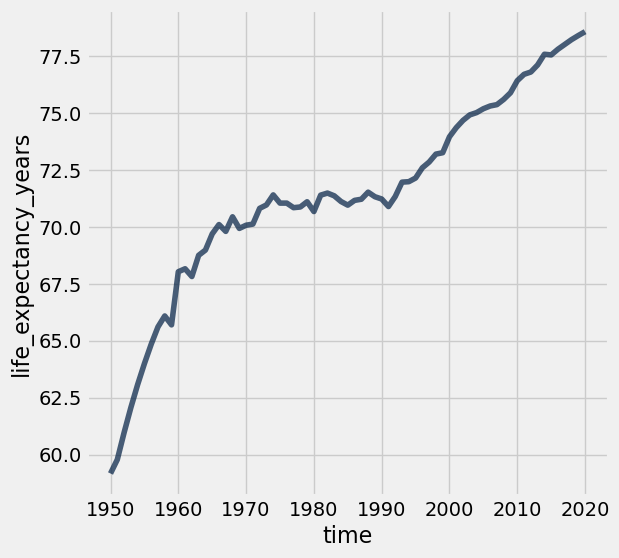

In [12]:
life_expectancy_2 = life_expectancy.where("time", are.above_or_equal_to(1950)).where("geo","pol")
life_expectancy_2.plot("time","life_expectancy_years")

### Additional Analysis with Fertility Data

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her childbearing years, assuming she survived through age 49.

To further analyze the factors influencing population growth in Poland, I will write the function `fertility_over_time`. This function takes the Alpha-3 code of a country as `country_code` and a `start` year. It returns a two-column table with labels `Year` and `Children per woman`, containing one row per year starting with (and including) the `start` year and including all later years in the `fertility` table.

Then, I will set `poland_code` to the Alpha-3 code for Poland. Using the provided call `fertility_over_time(poland_code, 1950)`, I will obtain a table that shows Poland's annual fertility rates since 1950.

In [13]:
def fertility_over_time(country_code, start):
    """Create a two-column table that describes a country's total fertility rate each year."""
    result = fertility.where("geo", country_code).where("time",are.above_or_equal_to(start)).select("time","children_per_woman_total_fertility").relabeled("time","Year").relabeled("children_per_woman_total_fertility","Children per woman")
    return result


poland_code = 'pol'
fertility_over_time(poland_code, 1950)

Year,Children per woman
1950,3.6
1951,3.62
1952,3.64
1953,3.65
1954,3.64
1955,3.6
1956,3.55
1957,3.47
1958,3.37
1959,3.25


Plotting the fertility rate in Poland since 1950, we see a downward trend.

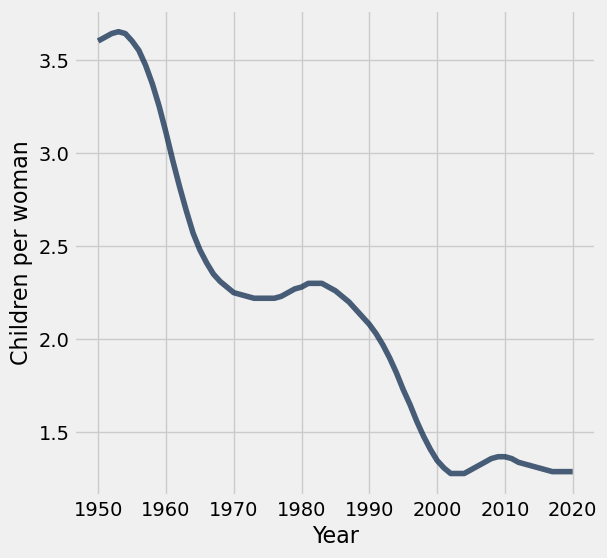

In [14]:
fertility_over_time(poland_code, 1950).plot(0, 1)

By analyzing this graph, I can observe how fertility rates in Poland have changed over the years and how they might have influenced population growth. The trends in fertility in the graph above help directly explain why the population growth rate decreased from 1950 to 2020 in Poland. It shows how women are having fewer children, which would have a direct effect on Poland's population growth rate.

### Observing the Relationship Between Fertility and Child Mortality Rates

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. We can see if this association is evident in Poland by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

### Poland Fertility and Child Mortality Data Analysis

In this section, I will create a table named `poland_since_1950` that contains data for each year starting from 1950. The table will have the following columns:
- `Year` containing the year
- `Children per woman` describing total fertility in Poland for that year
- `Child deaths per 1000 born` describing child mortality

In [15]:
pol_fertility = fertility_over_time(poland_code, 1950)
poland_since_1950 = pol_fertility.join("Year",child_mortality.where("geo","pol"),"time").drop("geo").relabeled("child_mortality_under_5_per_1000_born","Child deaths per 1000 born")
poland_since_1950

Year,Children per woman,Child deaths per 1000 born
1950,3.6,164.08
1951,3.62,177.18
1952,3.64,140.16
1953,3.65,127.65
1954,3.64,118.9
1955,3.6,110.38
1956,3.55,94.19
1957,3.47,86.72
1958,3.37,81.28
1959,3.25,72.1


To visualize the trends in fertility and child mortality in Poland from 1950 onwards, I will create a scatter plot from the `poland_since_1950` table. The plot will use **color** to encode data about the `Year` column, with colors ranging from dark blue to white representing the passage of time between 1950 and 2020. Points from the 1950s will appear as **dark blue**, while points from the 2010s will be **light blue**.

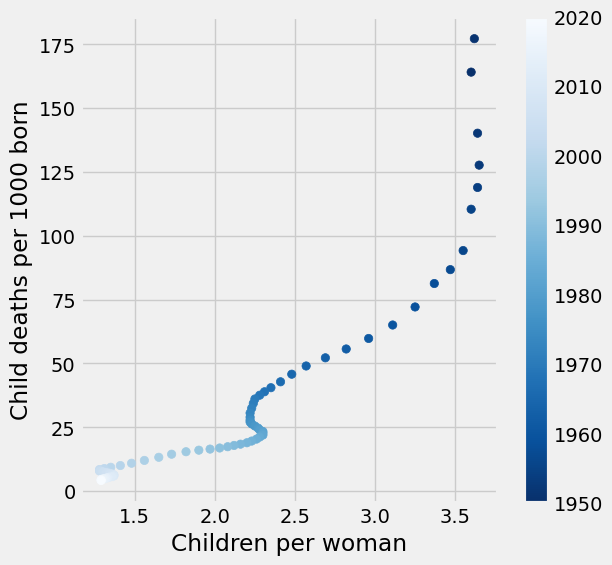

In [16]:
x_births = poland_since_1950.column("Children per woman")
y_deaths = poland_since_1950.column("Child deaths per 1000 born")
time_colors = poland_since_1950.column("Year")

plots.figure(figsize=(6,6))
plots.scatter(x_births, y_deaths, c=time_colors, cmap="Blues_r")
plots.colorbar()                  
plots.xlabel("Children per woman")
plots.ylabel("Child deaths per 1000 born");

The scatter plot illustrates the association between fertility and child mortality in Poland from 1950 to 2020. 

Fertility and child mortality are directly associated, meaning that as fertility increases, child mortality is likely to increase. However, there is more nuance to this association, as evidenced by the cluster of values around 2.25 children per woman. This clustering makes it difficult to establish a clear causal relationship between fertility and child mortality solely based on this diagram.

### The World

The changes observed in Poland can also be observed in many other countries: except during periods of extended war, famine, and social chaos, health services generally improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and where it does, the population growth rate decreases despite increasing longevity.

To illustrate these global trends, I will generate two overlaid histograms showing the distributions of total fertility rates for the years 1962 and 2010 among all 201 countries in the `fertility` table.

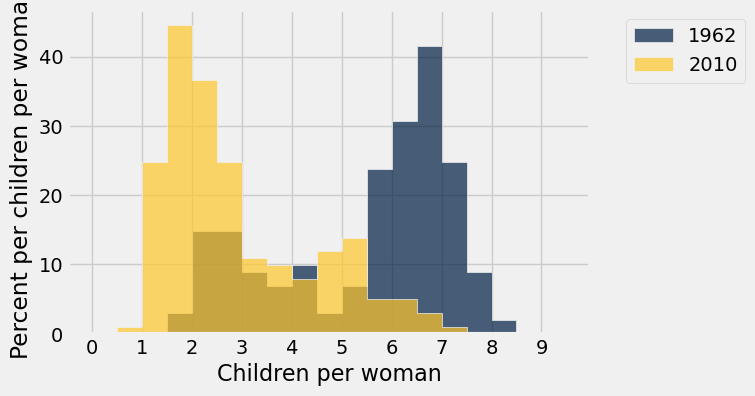

In [17]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10, 0.5), unit='child per woman')
_ = plots.xlabel('Children per woman')
_ = plots.ylabel('Percent per children per woman')
_ = plots.xticks(np.arange(10))

From the diagram, we can tell:

1. About the same number of countries had a fertility rate between 3.5 and 4.5 in both 1962 and 2010.
2. In 1962, less than 20% of countries had a fertility rate below 3.
3. At least half of countries had a fertility rate between 5 and 8 in 1962.
4. At least half of countries had a fertility rate below 3 in 2010.
5. More countries had a fertility rate above 3 in 1962 than in 2010.

To visualize the growth of the world population from 1800 through 2020, I will draw a line plot showing the sum of all countries' populations for each year in this range. This data will be sourced from the `population` table defined earlier in the project.

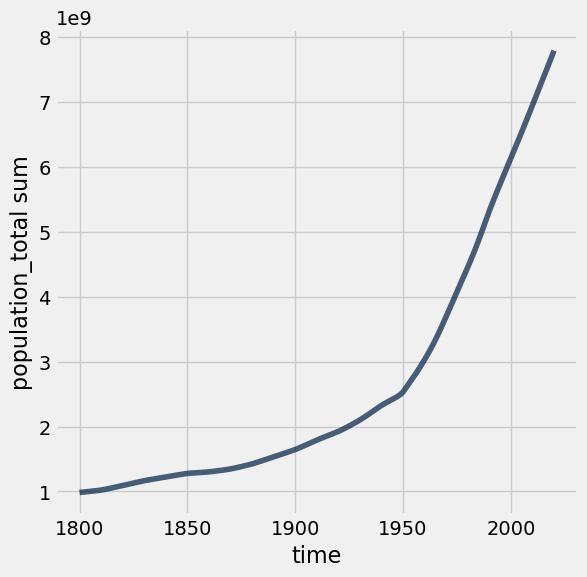

In [18]:
world_pop = population.group("time",sum).drop("geo sum")
world_pop.plot("time","population_total sum")

### Creating a Function to Retrieve Statistics for a Specific Year

I created a function `stats_for_year` that takes a `year` as input and returns a table of statistics. The table will have four columns: `geo`, `population_total`, `children_per_woman_total_fertility`, and `child_mortality_under_5_per_1000_born`. Each row will contain one unique Alpha-3 country code and three statistics: population, fertility rate, and child mortality for that `year` from the `population`, `fertility`, and `child_mortality` tables. Only rows for which all three statistics are available for the country and year are included. Additionally, the result is restricted to country codes that appear in `big_50`, an array of the 50 most populous countries in 2020.

In [19]:
big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    """Return a table of the stats for each country that year."""
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')
    f = fertility.where('time', are.equal_to(year)).drop('time')
    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    stats_table = p.join("geo", f, "geo").join("geo",c,"geo")
    return stats_table

test =stats_for_year(1960)
test

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,8996967,7.45,356.9
ago,5454938,7.48,308.45
arg,20481781,3.11,73.28
bgd,48013505,6.73,260.24
bra,72179235,6.21,169.18
can,17847404,3.88,32.6
chn,660408054,3.99,308.99
cod,15248256,6,273.92
col,16057714,6.81,135.64
deu,73414229,2.4,40.47


### Population by Decade
To analyze the population trends by decade, I will create a table called `pop_by_decade` with two columns: `decade` and `population`. This table will have a row for each year that starts a decade, from 1960 to 2020. The `population` column will contain the total population of all countries included in the result of `stats_for_year(year)` for the first year of the decade.

First, I will define a helper function `pop_for_year` to compute the total population for a given year using the `stats_for_year` function.

In [20]:
def pop_for_year(year):
    """Returns the total population for the specified year."""
    pop_total = sum(stats_for_year(year).column("population_total"))
    return pop_total


In [21]:
decades = Table().with_column('decade', np.arange(1960, 2021, 10))

pop_by_decade = decades.with_column("population", decades.apply(pop_for_year))
pop_by_decade.set_format(1, NumberFormatter)

decade,population
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


The `countries` table describes various characteristics of countries. The `country` column contains the same codes as the `geo` column in each of the other data tables (`population`, `fertility`, and `child_mortality`). The `world_6region` column classifies each country into a region of the world. Here, I inspect the data.

In [22]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
ago,Angola,sub_saharan_africa
alb,Albania,europe_central_asia
and,Andorra,europe_central_asia
are,United Arab Emirates,middle_east_north_africa
arg,Argentina,america
arm,Armenia,europe_central_asia
atg,Antigua and Barbuda,america
aus,Australia,east_asia_pacific
aut,Austria,europe_central_asia


### Counting Countries by Region for 2020

I created a table called `region_counts` that contains two columns: `region` and `count`. The `region` column contains regions of the world, and the `count` column contains the number of countries in each region that appear in the result of `stats_for_year(2020)`.

To accomplish this, I used the `stats_for_year` function to get the statistics for 2020 and then grouped the data by region to count the number of countries in each region.

In [23]:
stats_for_2020 = stats_for_year(2020)
region_counts = countries.join("country",stats_for_2020,"geo").group("world_6region").relabeled("world_6region","region")
region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


The following scatter diagram compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world.

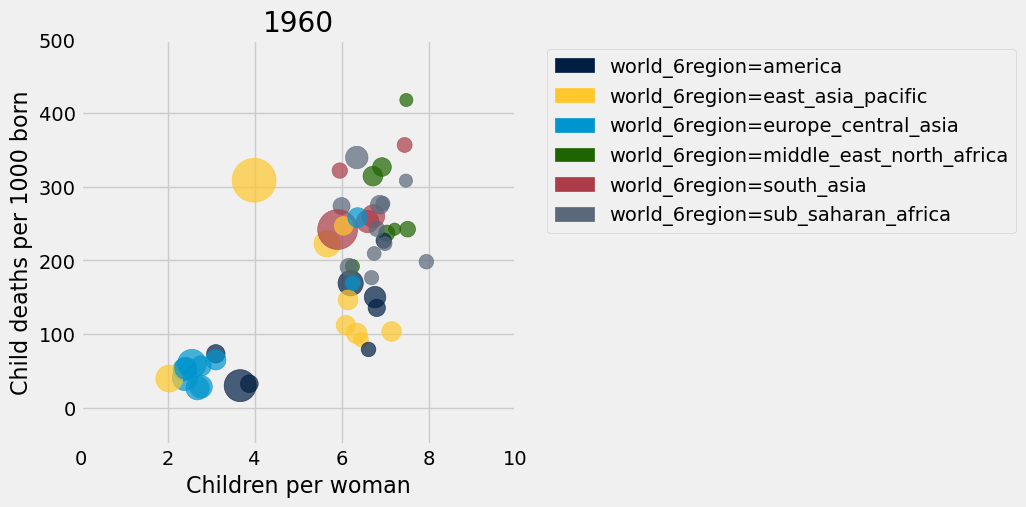

In [24]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

The scatter diagram shows us that:

- Most countries had a fertility rate above 5.
- There was an association between child mortality and fertility.

### Interactive Visualization of Population Changes Over Time

The interactive visualization below allows you to explore how countries have changed over time. By dragging the slider to the right, you can observe the shrinking divide between the countries of the global North and global South in terms of population growth that existed in the 1960s. 

This shift in fertility rates is one of the reasons why the global population is expected to grow more slowly in the 21st century compared to the 19th and 20th centuries. Fertility rates change due to various factors, including cultural patterns, better prospects for children surviving to adulthood, and family planning (such as contraception and women’s greater control over their reproduction).

In [25]:
_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…

### Population and Fertility: A Data Scientist's Perspective

When we look at population and fertility as data scientists, it is crucial to learn about the experiences of people in real life, not just abstractly as data. Population studies have sometimes had political undercurrents, including issues related to population control, control of women’s reproduction, or fears of shifts between racial groups. To do better as data scientists, we should check our assumptions to avoid unthinkingly reproducing past patterns.

By acknowledging these historical and social contexts, we can ensure that our analyses are more ethical and reflective of the diverse realities faced by different populations. This approach helps us to produce more accurate and meaningful insights, contributing to better-informed policies and interventions that respect individual rights and promote social justice.

#### Key Points to Consider:
1. **Understanding Real-life Experiences**: Data should be complemented with an understanding of the lived experiences of the populations being studied.
2. **Awareness of Political Underpinnings**: Be mindful of the historical and political contexts that have shaped population studies.
3. **Avoiding Assumptions**: Regularly check and question assumptions to avoid perpetuating past biases and injustices.

By integrating these principles into our work, we can strive to be more responsible and effective data scientists, contributing positively to the field of population and fertility studies.

## 2. Examining Global Poverty


In 1800, 85% of the world's 1 billion people lived in [extreme poverty](https://en.wikipedia.org/wiki/Extreme_poverty), defined by the United Nations as "a condition characterized by severe deprivation of basic human needs, including food, safe drinking water, sanitation facilities, health, shelter, education, and information." At the time when the data in this project were gathered, a common definition of extreme poverty was a person living on less than $1.25 a day.

In 2018, the proportion of people living in extreme poverty was estimated to be [about 9%](https://unstats.un.org/sdgs/report/2019/goal-01/). Although the world rate of extreme poverty has declined consistently for hundreds of years, the number of people living in extreme poverty is still over 600 million. The United Nations adopted an [ambitious goal](http://www.un.org/sustainabledevelopment/poverty/): "By 2030, eradicate extreme poverty for all people everywhere."

In this part of the project, I will examine some aspects of global poverty that might affect whether this goal is achievable. The causes of poverty are complex, involving global histories, such as colonialism, as well as factors such as health care, economics, and social inequality in each country.

### Loading Population and Poverty Data

First, I will load the population and poverty rate by country and year, along with the country descriptions. The `population` table has values for every recent year for many countries, while the `poverty` table only includes certain years for each country in which a measurement of the rate of extreme poverty was available.

By examining these datasets, I can gain insights into the global patterns of population and poverty and analyze factors that might influence the achievement of the United Nations' goal to eradicate extreme poverty by 2030.

In [26]:
population = Table.read_table('population.csv')
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('poverty.csv')
poverty.show(3)

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53


### Creating the `latest_poverty` Table

To analyze the most recent extreme poverty rates for each country, I will create a table called `latest_poverty`. This table will have three columns:
1. The 3-letter code for the country.
2. The most recent year for which an extreme poverty rate is available for the country.
3. The poverty rate in that year.

By organizing the data in this way, I can easily access the latest available information on extreme poverty rates for each country and use it for further analysis.

Here is the resulting table:

In [27]:
def first(values):
    return values.item(0)

latest_poverty = poverty.sort("time",descending=True).group("geo",first)
latest_poverty = latest_poverty.relabeled(0, 'geo').relabeled(1, 'time').relabeled(2, 'poverty_percent')
latest_poverty

geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


### Creating the `recent_poverty_total` Table

To analyze the most recent extreme poverty rates along with population data, I will create a table called `recent_poverty_total`. This table will have four columns:
1. `geo` contains the 3-letter country code.
2. `poverty_percent` contains the most recent poverty percent.
3. `population_total` contains the population of the country in 2010.
4. `poverty_total` contains the number of people in poverty, rounded to the nearest integer, based on the 2010 population and most recent poverty rate.

Here is the process to create the `recent_poverty_total` table:

1. **Merging Data**: Merge the `latest_poverty` table with the `population` table to include the population data for 2010.
2. **Calculating Poverty Total**: Calculate the number of people in poverty by multiplying the poverty percent by the population total and rounding to the nearest integer.

By structuring the data in this way, I can efficiently analyze the most recent poverty rates alongside the population data for 2010.

Here is the resulting table:

In [28]:
population

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000
afg,1803,3280000
afg,1804,3280000
afg,1805,3280000
afg,1806,3280000
afg,1807,3280000
afg,1808,3280000
afg,1809,3280000


In [29]:
poverty_and_pop = latest_poverty.join("geo",population.where("time",2010),"geo").drop("time","time_2")
recent_poverty_total = poverty_and_pop.with_column("poverty_total", np.round(poverty_and_pop.column("poverty_percent") / 100 * poverty_and_pop.column("population_total")))
recent_poverty_total

geo,poverty_percent,population_total,poverty_total
ago,43.37,23356247,1.01296e+07
alb,0.46,2948029,13561
arg,1.41,40895751,576630
arm,1.75,2877314,50353
aus,1.36,22154687,301304
aut,0.34,8409945,28594
aze,0.31,9032465,28001
bdi,81.32,8675606,7.055e+06
bel,0.5,10938735,54694
ben,51.61,9199254,4.74774e+06


### Calculating the Percentage of the World's Population Living in Extreme Poverty in 2010

To find the known percentage of the world’s 2010 population that were living in extreme poverty, I will use the `recent_poverty_total` table and the `population` table.

Here are the steps I will follow:

1. **Sum of People in Extreme Poverty**: Calculate the total number of people living in extreme poverty using the `poverty_total` column from the `recent_poverty_total` table.
2. **World Population in 2010**: Calculate the total world population in 2010 using the `population` table.
3. **Calculate Percentage**: Compute the percentage of the world's population living in extreme poverty by dividing the total number of people in extreme poverty by the total world population in 2010 and multiplying by 100.

This approach ensures that we account for the subset of countries included in the `recent_poverty_total` table while considering the overall world population.

Here are the calculations:

In [30]:
poverty_percent = sum(recent_poverty_total.column("poverty_total")) / sum(population.where("time", 2010).column("population_total")) * 100
poverty_percent

14.248865303997139

The `countries` table includes not only the name and region of countries, but also their positions on the globe.

In [31]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
ago,Angola,africa,-12.5,18.5
alb,Albania,europe,41,20
and,Andorra,europe,42.5078,1.52109
are,United Arab Emirates,asia,23.75,54.5
arg,Argentina,americas,-34,-64
arm,Armenia,europe,40.25,45
atg,Antigua and Barbuda,americas,17.05,-61.8
aus,Australia,asia,-25,135
aut,Austria,europe,47.3333,13.3333


### Creating the `poverty_map` Table

To visualize the distribution of extreme poverty across different countries, I will create a table called `poverty_map`. This table will have five columns:
1. `latitude` contains the country's latitude.
2. `longitude` contains the country's longitude.
3. `name` contains the country's name.
4. `region` contains the country's region from the `world_4region` column of `countries`.
5. `poverty_total` contains the country's poverty total.

By combining geographical data with poverty totals, we can create a map that highlights the regions most affected by extreme poverty.

Here are the steps to create the `poverty_map` table:

1. **Merge Data**: Merge the `countries` table with the `recent_poverty_total` table to include latitude, longitude, name, and region information.
2. **Select and Order Columns**: Select the relevant columns and ensure they are in the correct order.

Here is the resulting table:

In [32]:
poverty_map = countries.join("country",recent_poverty_total,"geo").select("latitude","longitude","name","world_4region", "poverty_total").relabeled("world_4region","region")
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,1.01296e+07
41,20,Albania,europe,13561
-34,-64,Argentina,americas,576630
40.25,45,Armenia,europe,50353
-25,135,Australia,asia,301304
47.3333,13.3333,Austria,europe,28594
40.5,47.5,Azerbaijan,europe,28001
-3.5,30,Burundi,africa,7.055e+06
50.75,4.5,Belgium,europe,54694
9.5,2.25,Benin,africa,4.74774e+06


In [33]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('name'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total')
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Although people lived in extreme poverty throughout the world in 2010 (with more than 5 million in the United States), the largest numbers were in Asia and Africa.

### Identifying the Countries with the Largest Number of People Living in Extreme Poverty

To find the countries with the largest number of people living in extreme poverty, I will create a table called `largest`. This table will have two columns:
1. `name` contains the country's name.
2. `poverty_total` contains the country's poverty total.

The table will include the 10 countries with the largest number of people living in extreme poverty.

Here is the process to create the `largest` table:

1. **Sort Data**: Sort the `poverty_map` table by the `poverty_total` column in descending order.
2. **Select Top 10**: Select the top 10 countries with the highest `poverty_total`.
3. **Select and Order Columns**: Select the `name` and `poverty_total` columns.

Here is the resulting table:

In [34]:
largest = poverty_map.sort("poverty_total", descending = True).take(np.arange(10)).select("name","poverty_total")
largest.set_format('poverty_total', NumberFormatter)

name,poverty_total
India,"291,660,639.00"
Nigeria,"98,319,537.00"
China,"85,687,544.00"
Bangladesh,"63,826,375.00"
"Congo, Dem. Rep.","56,635,412.00"
Indonesia,"39,177,145.00"
Ethiopia,"32,242,742.00"
Pakistan,"22,858,700.00"
Tanzania,"19,281,872.00"
Madagascar,"18,543,643.00"


In [35]:
poverty

geo,time,extreme_poverty_percent_people_below_125_a_day
alb,1996,0.2
alb,2002,0.73
alb,2004,0.53
alb,2005,0.44
alb,2008,0.2
alb,2012,0.46
dza,1988,7.1
dza,1995,6.38
ago,2000,54.31
ago,2009,43.37


In [36]:
countries

country,g77_and_oecd_countries,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,un_state,unicef_region,unicode_region_subtag,world_4region,world_6region
afg,g77,low_income,True,AF,AFG,4,nan,landlocked,33,66,muslim,Afghanistan,True,sa,AF,asia,south_asia
ago,g77,upper_middle_income,True,AO,AGO,24,nan,coastline,-12.5,18.5,christian,Angola,True,ssa,AO,africa,sub_saharan_africa
alb,others,upper_middle_income,True,AL,ALB,8,nan,coastline,41,20,muslim,Albania,True,eca,AL,europe,europe_central_asia
and,others,high_income,True,AD,AND,20,nan,landlocked,42.5078,1.52109,christian,Andorra,True,eca,AD,europe,europe_central_asia
are,g77,high_income,True,AE,ARE,784,nan,coastline,23.75,54.5,muslim,United Arab Emirates,True,mena,AE,asia,middle_east_north_africa
arg,g77,upper_middle_income,True,AR,ARG,32,nan,coastline,-34,-64,christian,Argentina,True,lac,AR,americas,america
arm,others,lower_middle_income,True,AM,ARM,51,nan,landlocked,40.25,45,christian,Armenia,True,eca,AM,europe,europe_central_asia
atg,g77,high_income,True,AG,ATG,28,nan,coastline,17.05,-61.8,christian,Antigua and Barbuda,True,lac,AG,americas,america
aus,oecd,high_income,True,AU,AUS,36,nan,coastline,-25,135,christian,Australia,True,eap,AU,asia,east_asia_pacific
aut,oecd,high_income,True,AT,AUT,40,nan,landlocked,47.3333,13.3333,christian,Austria,True,eca,AT,europe,europe_central_asia


### Generalized Process for Creating the `poverty_timeline` Function

To create the `poverty_timeline` function, I'll follow a series of steps to ensure the function outputs a line plot of the number of people living in poverty in a given country over time. Here's my generalized process:

#### Function Output
The `poverty_timeline` function should output a line plot with the following characteristics:
- The horizontal axis (x-axis) represents time (years).
- The vertical axis (y-axis) represents the number of people living in poverty.
- Each point on the line plot corresponds to a year for which poverty data is available for the specified country.

#### Steps I'll Take Within the Function
1. **Filter Data by Country Name**:
   - I'll use the `countries` table to find the Alpha-3 country code that corresponds to the provided country name.
   - I'll filter the `poverty` table to include only the rows corresponding to the identified country code.

2. **Retrieve Population Data**:
   - I'll filter the `population` table to include only the rows for the identified country code.

3. **Merge Data**:
   - I'll merge the filtered `poverty` table with the filtered `population` table based on the year to combine poverty rates and population data for each year.

4. **Calculate People Living in Poverty**:
   - I'll compute the number of people living in poverty for each year by multiplying the poverty percentage by the population for that year.

5. **Create Line Plot**:
   - I'll plot the computed number of people living in poverty against the years using a line plot.

6. **Customize the Plot**:
   - I'll add labels to the x-axis and y-axis.
   - I'll set an appropriate title for the plot.
   - I'll add markers to the points on the plot for clarity.

In [37]:
population

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000
afg,1803,3280000
afg,1804,3280000
afg,1805,3280000
afg,1806,3280000
afg,1807,3280000
afg,1808,3280000
afg,1809,3280000


In [38]:
geo = countries.select("country","name")
geo

country,name
afg,Afghanistan
ago,Angola
alb,Albania
and,Andorra
are,United Arab Emirates
arg,Argentina
arm,Armenia
atg,Antigua and Barbuda
aus,Australia
aut,Austria


In [39]:
def poverty_timeline(country):
    '''Draw a timeline of people living in extreme poverty in a country.'''
    geo = countries.select("country","name")
    t1 = poverty.join("geo",geo,"country").where("name",country)
    t2 = t1.join("time",population.join("geo",geo,"country").where("name",country),"time")
    t3 = t2.with_columns("total poverty", t2.column("extreme_poverty_percent_people_below_125_a_day") / 100 * t2.column("population_total"))
    t3.plot("time","total poverty")

    plots.title(country)
    plots.ylim(bottom=0)
    plots.show()

Finally, I draw the line plots below to see how the world is changing.

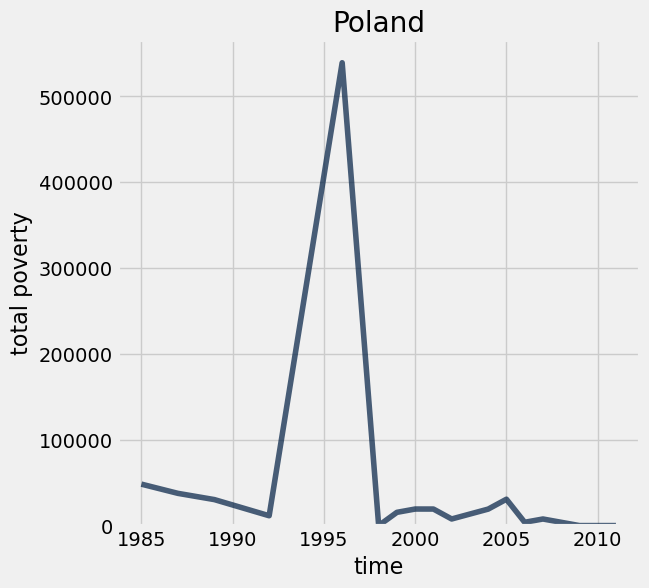

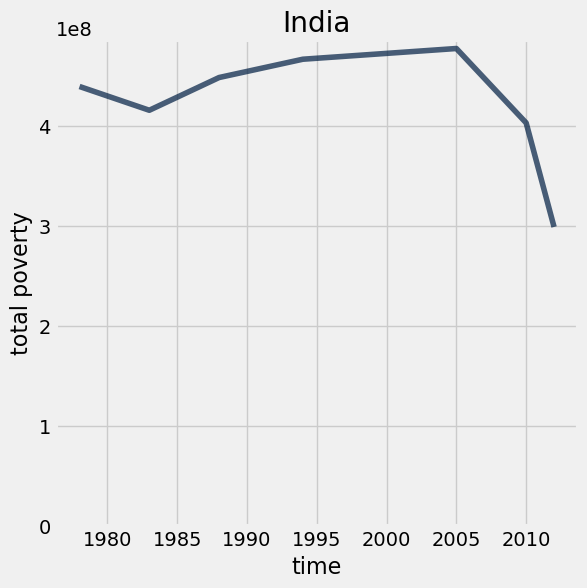

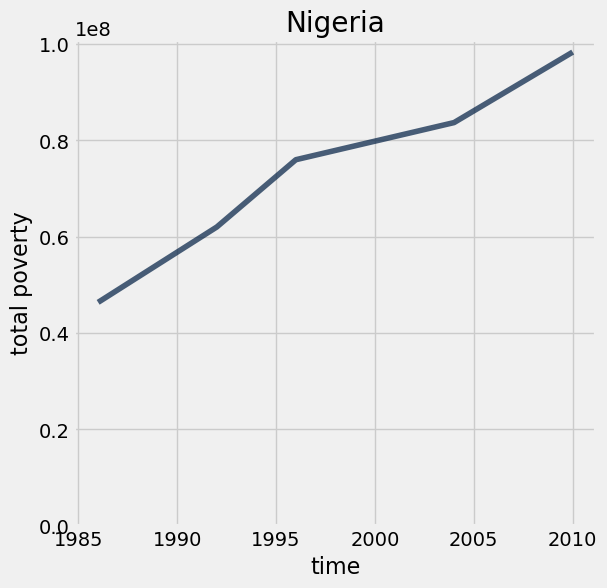

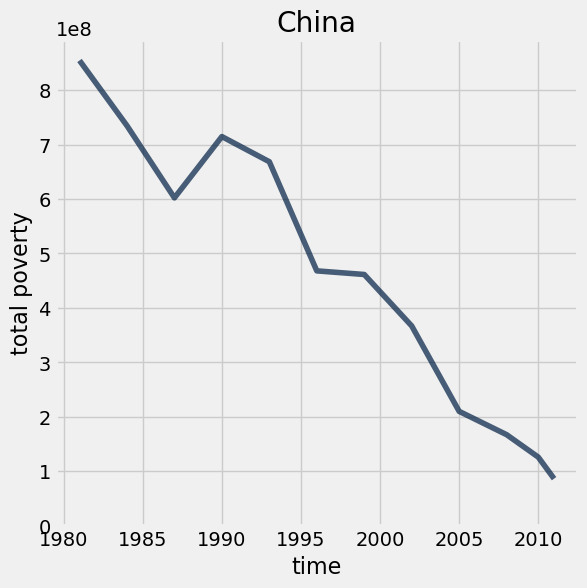

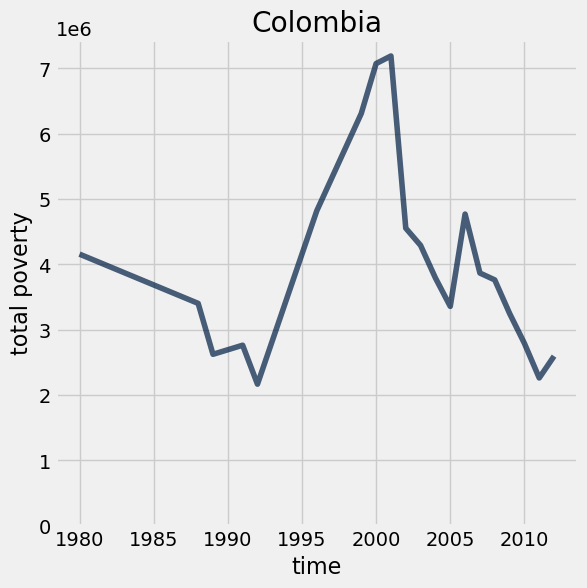

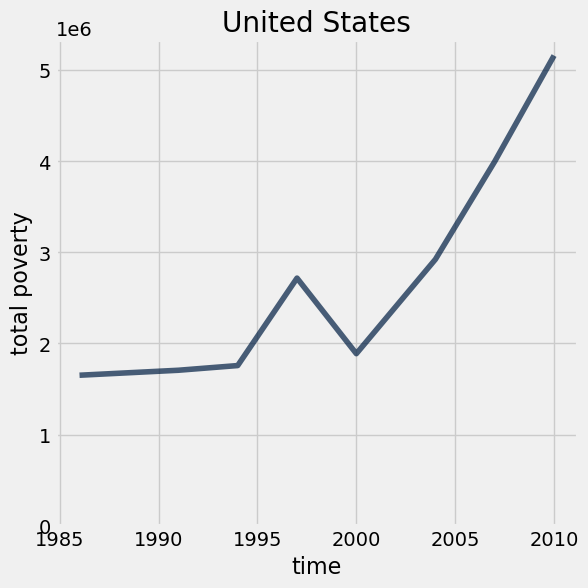

In [40]:
poverty_timeline('Poland')
poverty_timeline('India')
poverty_timeline('Nigeria')
poverty_timeline('China')
poverty_timeline('Colombia')
poverty_timeline('United States')

Although the number of people living in extreme poverty increased in some countries including Nigeria and the United States, the decreases in other countries, most notably the massive decreases in China and India, have shaped the overall trend that extreme poverty is decreasing worldwide, both in percentage and in absolute number. 

Below, I've also added an interactive dropdown menu to visualize `poverty_timeline` graphs for other countries. Note that each dropdown menu selection may take a few seconds to run.

In [41]:
all_countries = poverty_map.column('name')
_ = widgets.interact(poverty_timeline, country=list(all_countries))

interactive(children=(Dropdown(description='country', options=('Angola', 'Albania', 'Argentina', 'Armenia', 'A…

# Conclusion

In this project, I explored various aspects of global population and poverty using data from Gapminder. By analyzing the data, I gained insights into the trends and factors influencing population growth and poverty levels around the world. Here are some key takeaways from my analysis:

### Global Population Growth
The world population has experienced significant growth over the past two centuries, reaching milestones such as 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. While the growth rate is expected to slow down in the 21st century, the population is projected to stabilize at around 11 billion by 2100. Understanding these trends helps us anticipate future demographic changes and their potential impacts.

### Population Trends in Poland
Focusing on Poland, I examined its population trends from 1900 to 2020. Poland's population growth rate has been declining since 1950, influenced by factors such as life expectancy, child mortality, and fertility rates. The analysis revealed how these factors have shaped the country's demographic landscape over time.

### Fertility and Child Mortality
I investigated the relationship between fertility rates and child mortality in Poland. The analysis showed a direct association between the two, with higher fertility rates often accompanying higher child mortality rates. However, the data also indicated a complex relationship, making it challenging to establish causality solely based on the scatter plot.

### Global Poverty Analysis
Examining global poverty, I found that the proportion of people living in extreme poverty has declined from 85% in 1800 to about 9% in 2018. Despite this progress, over 600 million people still live in extreme poverty. The United Nations has set an ambitious goal to eradicate extreme poverty by 2030, and understanding the factors contributing to poverty is crucial for achieving this goal.

### Insights from the Poverty Data
By analyzing recent poverty data, I identified the countries with the largest number of people living in extreme poverty. Countries such as India, Nigeria, and China have significant populations in poverty, highlighting the need for targeted interventions and resources to address this issue.

### Reflections as a Data Scientist
As data scientists, it's important to consider the real-life experiences behind the data and be mindful of the historical and political contexts that shape population studies. By questioning assumptions and being aware of potential biases, we can produce more ethical and accurate analyses that contribute to better-informed policies and interventions.

In conclusion, this project provided valuable insights into global population and poverty trends, emphasizing the importance of data-driven approaches to understanding and addressing these complex issues. By continuing to explore and analyze data, we can contribute to efforts aimed at improving the quality of life for people around the world.